In [1]:
!pip install wfdb --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 4.2 MB/s eta 0:00:00


In [2]:
import wfdb
from scipy.signal import butter, filtfilt
import numpy as np
from scipy.signal import resample
from re import S
import os

In [3]:
def bandpass_filter(signal, fs=250, lowcut=0.5,  highcut=15.0,  order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)
    
def smooth_signal(data, window_size=5):
    window = np.ones(window_size) / window_size
    smoothed = np.convolve(data, window, mode='same')
    return smoothed
def normalize_signal(data):
    return (data - np.mean(data)) / np.std(data)

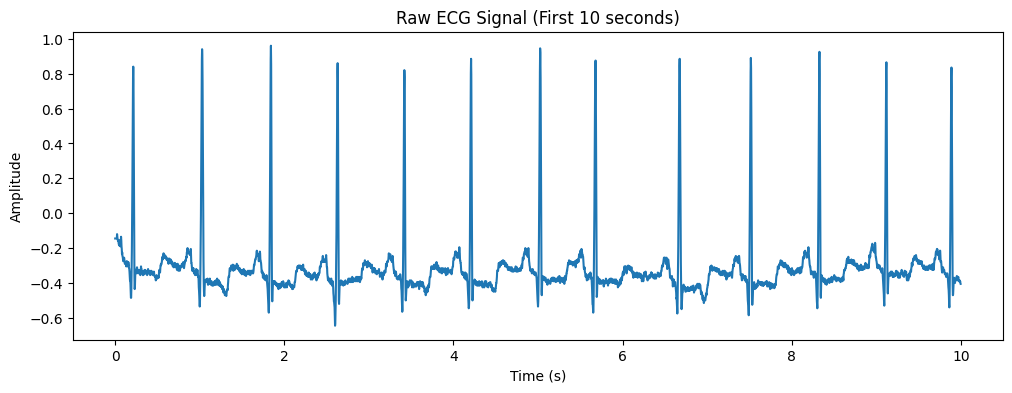

In [4]:
import matplotlib.pyplot as plt
path = "/kaggle/input/qtdb-ludb/physionet.org/files/mitdb/1.0.0/"
name = '100'
full_path = path + name
record = wfdb.rdrecord(full_path)
annotation = wfdb.rdann(full_path, 'atr')

ecg_signal = record.p_signal[:, 0]
fs = record.fs

time_axis = [i / fs for i in range(len(ecg_signal))]

plt.figure(figsize=(12, 4))
plt.plot(time_axis[:fs*10], ecg_signal[:fs*10])
plt.title("Raw ECG Signal (First 10 seconds)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


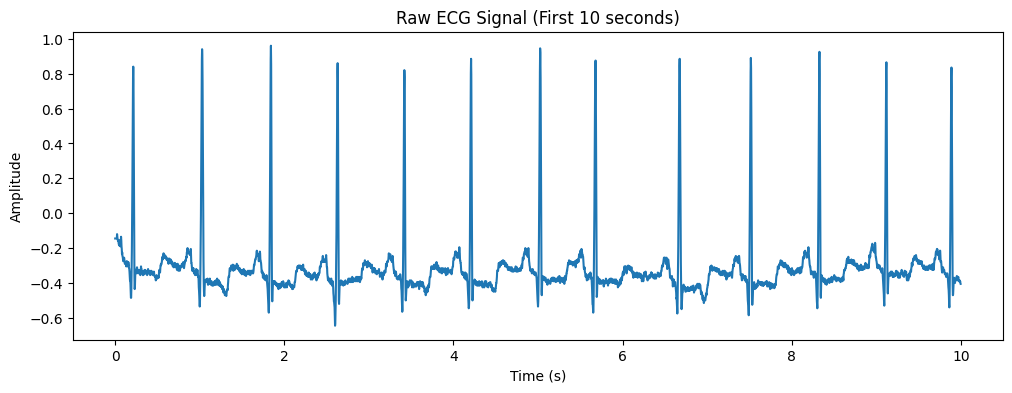

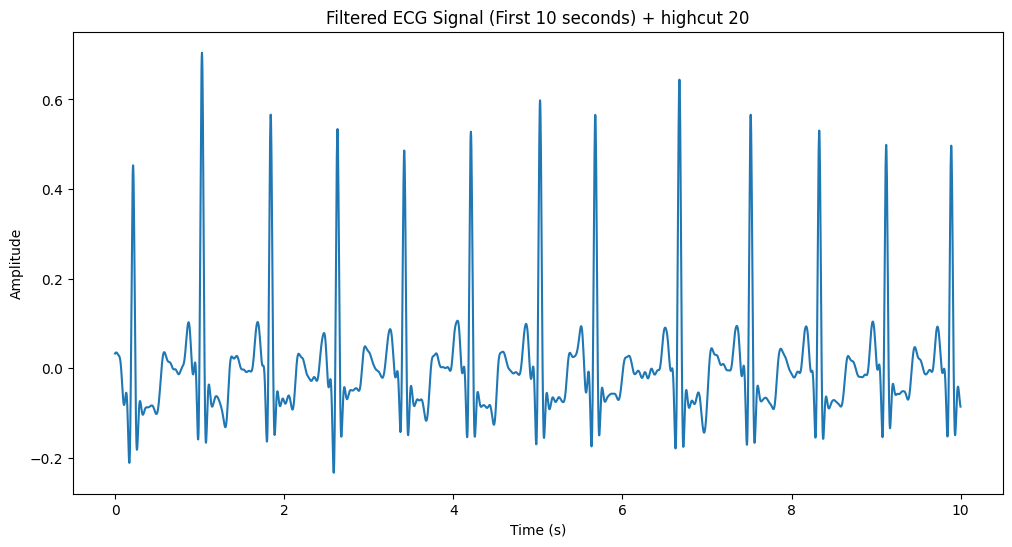

In [5]:
# Example usage
time_axis = np.arange(0, len(ecg_signal)) / fs  # Time axis in seconds




# Plot the first 10 seconds of the raw ECG signal
plt.figure(figsize=(12, 4))
plt.plot(time_axis[:fs*10], ecg_signal[:fs*10])
plt.title("Raw ECG Signal (First 10 seconds)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()




filtered_signal = bandpass_filter(ecg_signal, fs, lowcut=0.5 ,highcut=15)

# Plot filtered signal
plt.figure(figsize=(12, 6))
plt.plot(time_axis[:fs*10], filtered_signal[:fs*10])
plt.title("Filtered ECG Signal (First 10 seconds) + highcut 20")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


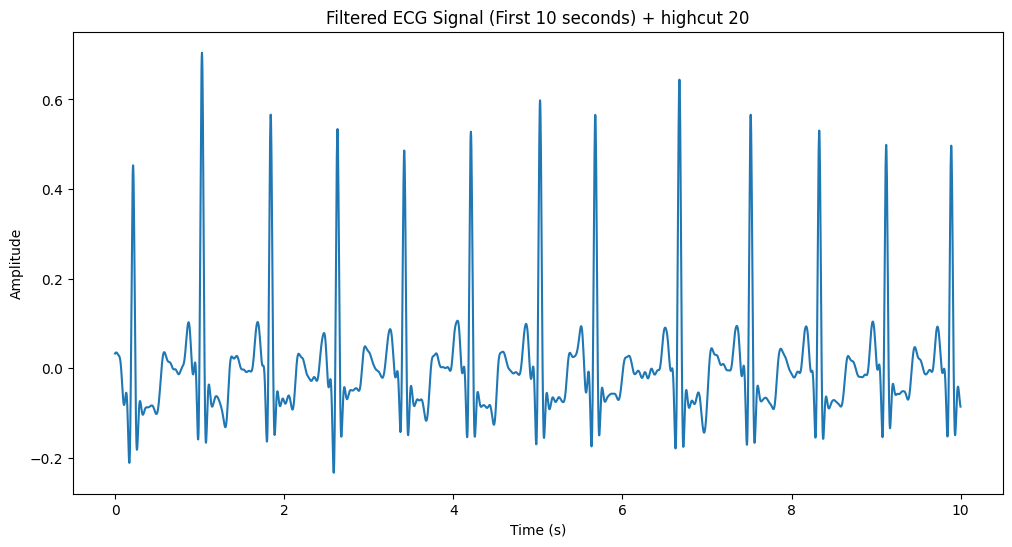

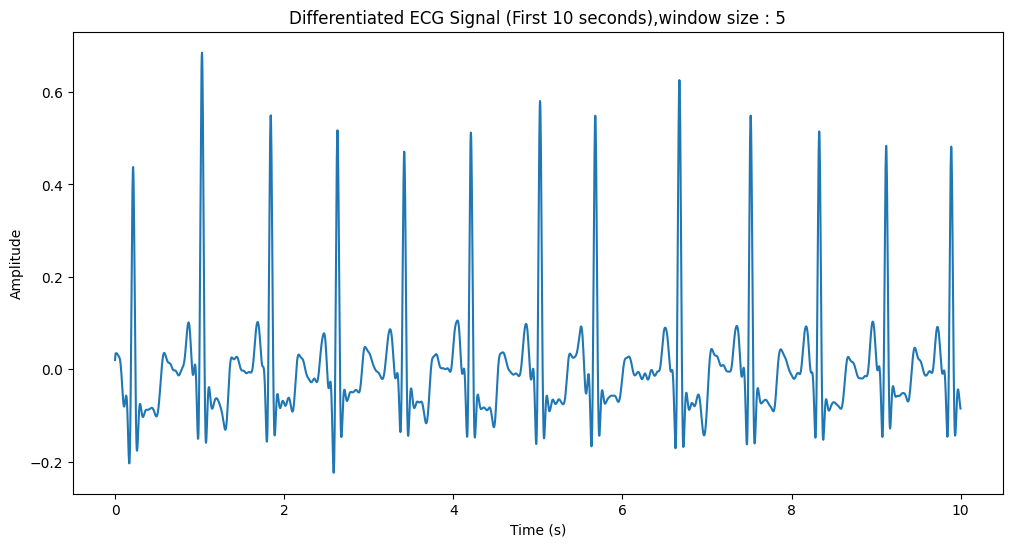

In [6]:
##### filtered_signal = bandpass_filter(ecg_signal, fs, lowcut=0.5 ,highcut=20)

# Plot filtered signal
plt.figure(figsize=(12, 6))
plt.plot(time_axis[:fs*10], filtered_signal[:fs*10])
plt.title("Filtered ECG Signal (First 10 seconds) + highcut 20")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Optionally differentiate the signal
differentiated_signal = smooth_signal(filtered_signal, 5)



# Plot differentiated signal (optional)
plt.figure(figsize=(12, 6))
plt.plot(time_axis[:fs*10], differentiated_signal[:fs*10])
plt.title("Differentiated ECG Signal (First 10 seconds),window size : 5")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()




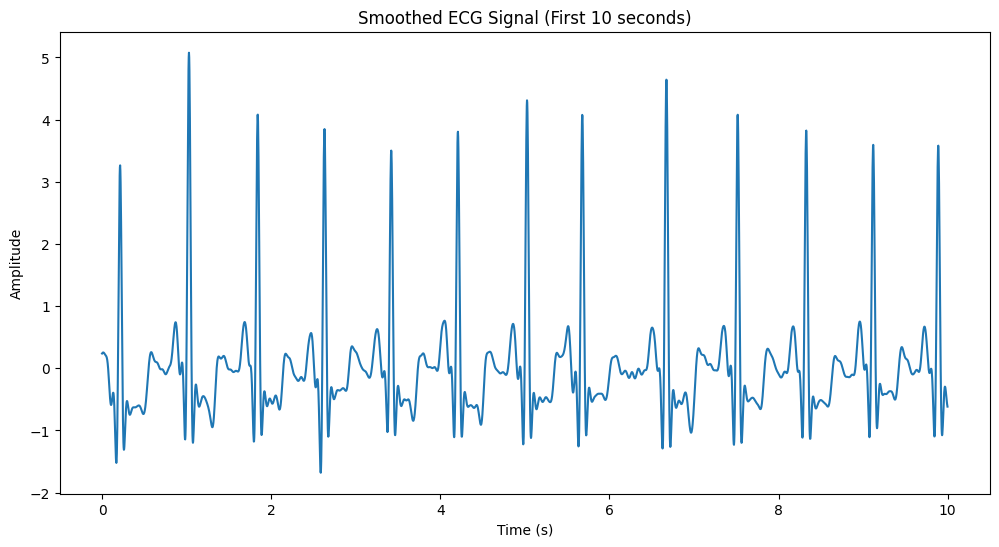

In [7]:
# Optionally smooth the signal
normalized_signal = normalize_signal(filtered_signal)

# Plot smoothed signal (optional)
plt.figure(figsize=(12, 6))
plt.plot(time_axis[:fs*10], normalized_signal[:fs*10])
plt.title("Smoothed ECG Signal (First 10 seconds)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

In [8]:

def resample_signal(signal, original_fs, target_fs):
    num_samples = int(len(signal) * target_fs / original_fs)
    resampled_signal = resample(signal, num_samples)
    return resampled_signal
signal = normalized_signal
if fs != 250:
    signal = resample_signal(signal, original_fs=fs, target_fs=fs)

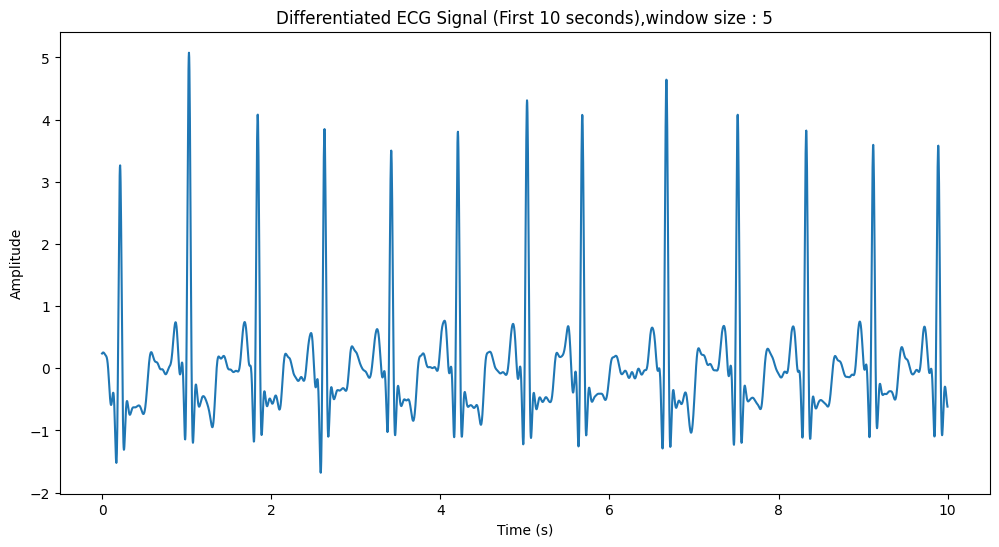

In [9]:
# Plot differentiated signal (optional)
plt.figure(figsize=(12, 6))
plt.plot(time_axis[:fs*10], signal[:fs*10])
plt.title("Differentiated ECG Signal (First 10 seconds),window size : 5")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

